In [3]:
import pandas as pd
data_pd = pd.read_csv('StreamingHistory_suj2.csv')

In [4]:
track_name = data_pd.trackName.unique()
len(track_name)

4944

In [5]:
df1 = data_pd['artistName'].value_counts().rename_axis('Artist').reset_index(name='No: of Artist')
df1.head(10)

Artist  No: of Artist
0     Taylor Swift           1590
1   Carlos Sadness            819
2        Bad Bunny            756
3       C. Tangana            639
4      Ed Maverick            490
5  Juancho Marqués            418
6         Pignoise            409
7         Anuel AA            363
8      Miley Cyrus            334
9        Vance Joy            259

<AxesSubplot:ylabel='Artist'>

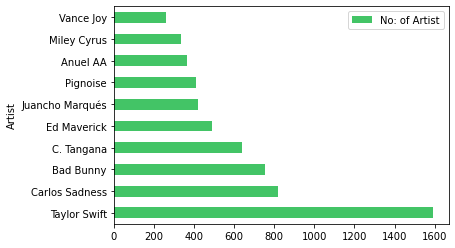

In [6]:
df1.head(10).plot.barh(x ='Artist', y='No: of Artist', color='#43c466')

In [7]:
df1_list = df1['Artist'].head(10).tolist()

In [8]:
print(df1_list)

['Taylor Swift', 'Carlos Sadness', 'Bad Bunny', 'C. Tangana', 'Ed Maverick', 'Juancho Marqués', 'Pignoise', 'Anuel AA', 'Miley Cyrus', 'Vance Joy']


In [10]:
import numpy as np
a =np.array(df1_list).astype(str)

In [11]:
track_list = data_pd['trackName'].tolist()
print(track_list)

['Falling', 'Acurrucar', 'Down With My Baby', 'Ya No Me Acuerdo', 'Sargento de Hierro', '15 Dreams', 'Cello Concerto in A Minor, Op. 33', "Ain't Your Mama", "Don't Call Me Up", 'White Lie', 'Hand In Hand', 'Confetti', 'La cabecita loca', 'Báilame', 'Stand By', 'England Skies', 'Hay un Fuego', 'Battle Cry', 'Not Easy', 'Gol', 'Venecia - Acústico', 'Amor Con Amor Se Paga', 'La Despedida', 'La Botella (feat. Cali Y El Dandee)', 'Noche de Estrellas', 'Tentándome', 'No Sigue Modas', 'Si No Te Quisiera', 'Amarte bien - feat. Juan Magán Remix', 'Mas Que una Amiga (feat. Adrian Rodriguez)', 'Como Tu No Hay Dos', 'Como Tu No Hay Dos', 'Soltera (feat. Danny Romero & Fito Blanko)', 'Pégate Más', 'Calor de Verano', 'Por Siempre', 'Se Vuelve Loca', 'Me enamoré - Feeling of Love', 'Ella No Volverá', 'Crush on You', 'Báilame', 'Báilame', 'Báilame', 'Please Be Mine', 'Morado', 'I Can Change', 'El Fin del Mundo', '+', 'El Fin del Mundo', 'Dream', 'Feeling Whitney', 'Si por mi fuera', 'Yelo', 'Por fin',

In [14]:
from spotipy.oauth2 import SpotifyClientCredentials
import spotipy
import json
import csv
import pylyrics3
import nltk

from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA
import spotipy.util as util

client_id ="d9833cd67ed34683b793cd4cee4a0c09" 
secret = "32c1d6dfe3924e1781904bc03e70d73e" 
client_credentials_manager = SpotifyClientCredentials(client_id, client_secret=secret) 
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
username =	'11159352293'
redirect_uri = 'http://localhost:7777/callback'
scope = 'user-read-recently-played'

token = util.prompt_for_user_token(username=username, 
                                   scope=scope, 
                                   client_id=client_id,   
                                   client_secret=secret,     
                                   redirect_uri=redirect_uri)


artist= 'Moses Sumney'
track= 'Lonely World'



import requests
def get_id(track_name: str, token: str, artist: str) -> str:
     headers = {
    'Accept': 'application/json',
    'Content-Type': 'application/json',
    'Authorization': f'Bearer ' + token,
    }
     params = [('q', track_name), ('type', 'track'),]
    
    
    
     try:
        response = requests.get('https://api.spotify.com/v1/search', 
                    headers = headers, params = params, timeout = 5)
        json = response.json()
        first_result = json['tracks']['items'][0]
        track_id = first_result['id']
        return track_id
     except:
        return None

In [15]:
id_list=[]
for i in track_list:

    ids = get_id(i, token, artist='idk')
    id_list.append(ids)
print(id_list)

['1ZMiCix7XSAbfAJlEZWMCp', '1xYBeQ5u8uaJ3oBWktjGyJ', '33piV1LBNfYsUrDXeTOd7x', '1vHY8bEVI7Sg85xNMTDxXM', '1pv5scBTTQyqN2NOiEj8oe', '7KfhgSJGvdF9gebtWJrvhO', '7wWT7zdP8Uws7yriwSQyW3', '2hgzdQdnfWwtdpZbhZlV72', '5WHTFyqSii0lmT9R21abT8', '2QuQkdLLzgktXwruPAz6f4', '1N5w5JlZKaeOMJLziWRq6L', '40JjCZcdzT9ldZk5DhFqdZ', '63PNHwm8hgpkPeUFfUa4dk', '4TI9FgDGOFc2sF3w68iAAn', '6BxCmy6vGbuOckxg6YfQOW', '5fVFW9WqTsBt34JFhKxIty', '4jDnHToLAvPlAPB9aiMx3z', '6SCDzH7OCgpzwCP8yo7HIP', '6BXCXOJGvuhks2xDxj5opi', '45S5WTQEGOB1VHr1Q4FuPl', '2Q4iEmSiDVEenNSGk2rmoZ', '0ZU3ZpaMjmi5KLkAl9ovO1', '6XE2V2icEranw5YpS4WMDD', '4ltP2I0TmcSUdPVJcsXWcc', '2pbLzrByOZPibnYwSXLplI', '3jnw4c0qCQzSp3Ozmohp3a', '0Qqrehp0IC6ppqIUz6mPCe', '56J9sf5j7T8cPg1fOGmBRs', '5G4CaZVQHXn5TCHyreFYa8', '7Jfsbww3PlAzJBVQdeXdXj', '5IypFJnPEwFAPDTRz14ijX', '5IypFJnPEwFAPDTRz14ijX', None, None, None, None, None, None, None, None, None, None, None, '7DYaEBQbj6FQCsgPr0uc6p', '54FZ9j07kCWyAHcBAa2WAJ', '0jCe45cYIc6NXedmbIKy0Q', '5SeYlZyKVENMOxiSPQkKyw

In [16]:
id_list = [x for x in id_list if x is not None]

In [17]:
print(len(id_list))

13662


In [18]:
def getTrackFeatures(id):
    track_info = sp.track(id)
    features_info = sp.audio_features(id)
    #Información de la canción
    name = track_info['name']
    length = track_info['duration_ms']
    popularity = track_info['popularity']
    #Track features
    acousticness = features_info[0]['acousticness']
    danceability = features_info[0]['danceability']
    energy = features_info[0]['energy']
    instrumentalness = features_info[0]['instrumentalness']
    liveness = features_info[0]['liveness']
    loudness = features_info[0]['loudness']
    speechiness = features_info[0]['speechiness']
    tempo = features_info[0]['tempo']
    time_signature = features_info[0]['time_signature']
    
    track_data = [name, length, popularity, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, time_signature]
    return track_data

In [19]:
import time

In [22]:
from tqdm import tqdm
listOfTrack_AudioFeatures = []

IDs_AlreadyUsed = []

#i = 1
for track_ID in tqdm(id_list):#tqdm es para tener la progress bar
    #sp.audio_analysis("2xmrfQpmS2iJExTlklLoAL")
    
    #track = sp.track(track_ID)
    #print(track_SP)
    
    #track_Name = track["name"]     

    #track_explicit = track['explicit']
    
    
    
    features = sp.audio_features(track_ID)[0] # Get audio features for this specific track

    if features != None:
    
        track_AudioFeatures = [features['energy'], features['liveness'],
                               features['tempo'], features['speechiness'],
                               features['acousticness'], features['instrumentalness'],
                               features['time_signature'], features['danceability'],
                               features['key'], features['duration_ms'],
                               features['loudness'], features['valence'],
                               features['mode'], features['uri']]
    else:
        track_AudioFeatures = [None]*14


    #trackData = ( [ track_Name, track_ID, track_explicit] + track_AudioFeatures )
    trackData = ( [track_ID] + track_AudioFeatures )

    listOfTrack_AudioFeatures.append(trackData)

    #break
    #print(features)

    IDs_AlreadyUsed.append(track_ID)

    time.sleep(0.05)
    #print(i, i/63902)
    
    #i += 1

100%|██████████| 13662/13662 [30:28<00:00,  7.47it/s] 


In [23]:
l1 = id_list

l2 = IDs_AlreadyUsed

TrackIDs_StillNotParsed = [x for x in l1 if x not in l2]

In [24]:
TrackIDs_StillNotParsed [:10]

[]

In [25]:
audioFeaturesDF_AllTracks = pd.DataFrame(listOfTrack_AudioFeatures, 
                                columns=  [ "track_id",  #["track_name", "track_id", "explicit",
                                            'energy', 'liveness',
                                            'tempo', 'speechiness',
                                            'acousticness', 'instrumentalness',
                                            'time_signature', 'danceability',
                                            'key', 'duration_ms', 'loudness',
                                            'valence', 'mode', 'track_uri'])

In [26]:
audioFeaturesDF_AllTracks.head()

track_id  energy  liveness    tempo  speechiness  \
0  1ZMiCix7XSAbfAJlEZWMCp   0.267    0.0890  110.011       0.0299   
1  1xYBeQ5u8uaJ3oBWktjGyJ   0.216    0.0894   99.100       0.0353   
2  33piV1LBNfYsUrDXeTOd7x   0.338    0.7380   86.079       0.0372   
3  1vHY8bEVI7Sg85xNMTDxXM   0.392    0.2090  133.919       0.0624   
4  1pv5scBTTQyqN2NOiEj8oe   0.244    0.0681  132.916       0.0283   

   acousticness  instrumentalness  time_signature  danceability  key  \
0         0.839          0.000001               4         0.567    4   
1         0.944          0.007990               4         0.809    8   
2         0.796          0.000613               4         0.465    2   
3         0.503          0.000000               4         0.733    9   
4         0.331          0.000450               4         0.524   10   

   duration_ms  loudness  valence  mode                             track_uri  
0       240133    -6.502   0.0592     1  spotify:track:1ZMiCix7XSAbfAJlEZWMCp  
1       234080   -12.103   0.2360     1  spotify:track:1xYBeQ5u8uaJ3oBWktjGyJ  
2       223840   -11.978   0.3020     1  spotify:track:33piV1LBNfYsUrDXeTOd7x  
3       170053    -8.906   0.4230     0  spotify:track:1vHY8bEVI7Sg85xNMTDxXM  
4       239497    -8.363   0.1750     1  spotify:track:1pv5scBTTQyqN2NOiEj8oe

In [27]:
audioFeaturesDF_AllTracks.shape

(13662, 15)

In [28]:
audioFeaturesDF_AllTracks.to_csv("./Track_AudioFeatures_AllTracks.csv")

In [29]:
audioFeaturesDF_AllTracks_1 = pd.read_csv("./Track_AudioFeatures_AllTracks.csv").drop(["Unnamed: 0"], axis = 1)

In [30]:
audioFeaturesDF_AllTracks_1.head(20)

track_id  energy  liveness    tempo  speechiness  \
0   1ZMiCix7XSAbfAJlEZWMCp   0.267    0.0890  110.011       0.0299   
1   1xYBeQ5u8uaJ3oBWktjGyJ   0.216    0.0894   99.100       0.0353   
2   33piV1LBNfYsUrDXeTOd7x   0.338    0.7380   86.079       0.0372   
3   1vHY8bEVI7Sg85xNMTDxXM   0.392    0.2090  133.919       0.0624   
4   1pv5scBTTQyqN2NOiEj8oe   0.244    0.0681  132.916       0.0283   
5   7KfhgSJGvdF9gebtWJrvhO   0.959    0.3340  103.760       0.0794   
6   7wWT7zdP8Uws7yriwSQyW3   0.377    0.1170   79.445       0.0385   
7   2hgzdQdnfWwtdpZbhZlV72   0.678    0.0654  120.075       0.2330   
8   5WHTFyqSii0lmT9R21abT8   0.881    0.0793   98.994       0.1470   
9   2QuQkdLLzgktXwruPAz6f4   0.751    0.0670  127.996       0.0924   
10  1N5w5JlZKaeOMJLziWRq6L   0.480    0.1060  107.695       0.0315   
11  40JjCZcdzT9ldZk5DhFqdZ   0.643    0.0609  107.088       0.0530   
12  63PNHwm8hgpkPeUFfUa4dk   0.821    0.2940  159.906       0.0303   
13  4TI9FgDGOFc2sF3w68iAAn   0.896    0.2430   98.023       0.0461   
14  6BxCmy6vGbuOckxg6YfQOW   0.629    0.1410  132.663       0.0421   
15  5fVFW9WqTsBt34JFhKxIty   0.492    0.0970   83.008       0.0269   
16  4jDnHToLAvPlAPB9aiMx3z   0.553    0.1670  185.419       0.0398   
17  6SCDzH7OCgpzwCP8yo7HIP   0.901    0.1230  130.055       0.1240   
18  6BXCXOJGvuhks2xDxj5opi   0.699    0.3850   84.016       0.0566   
19  45S5WTQEGOB1VHr1Q4FuPl   0.838    0.1310  139.863       0.0557   

    acousticness  instrumentalness  time_signature  danceability  key  \
0       0.839000          0.000001               4         0.567    4   
1       0.944000          0.007990               4         0.809    8   
2       0.796000          0.000613               4         0.465    2   
3       0.503000          0.000000               4         0.733    9   
4       0.331000          0.000450               4         0.524   10   
5       0.000145          0.000000               4         0.464   11   
6       0.966000          0.856000               4         0.306    9   
7       0.047200          0.000009               4         0.757    8   
8       0.296000          0.000003               4         0.674    9   
9       0.177000          0.000000               4         0.839    1   
10      0.404000          0.000388               4         0.664    9   
11      0.178000          0.000000               4         0.733    9   
12      0.034300          0.000002               4         0.546    1   
13      0.268000          0.000829               4         0.796    1   
14      0.279000          0.436000               4         0.466    7   
15      0.158000          0.000024               4         0.562   10   
16      0.218000          0.000000               3         0.308    2   
17      0.041500          0.006490               4         0.232    8   
18      0.149000          0.006790               4         0.585    8   
19      0.210000          0.000131               4         0.448    4   

    duration_ms  loudness  valence  mode                             track_uri  
0        240133    -6.502   0.0592     1  spotify:track:1ZMiCix7XSAbfAJlEZWMCp  
1        234080   -12.103   0.2360     1  spotify:track:1xYBeQ5u8uaJ3oBWktjGyJ  
2        223840   -11.978   0.3020     1  spotify:track:33piV1LBNfYsUrDXeTOd7x  
3        170053    -8.906   0.4230     0  spotify:track:1vHY8bEVI7Sg85xNMTDxXM  
4        239497    -8.363   0.1750     1  spotify:track:1pv5scBTTQyqN2NOiEj8oe  
5        184293    -3.188   0.5660     1  spotify:track:7KfhgSJGvdF9gebtWJrvhO  
6         79467    -9.834   0.7060     1  spotify:track:7wWT7zdP8Uws7yriwSQyW3  
7        218235    -5.529   0.8200     0  spotify:track:2hgzdQdnfWwtdpZbhZlV72  
8        178480    -2.853   0.2340     1  spotify:track:5WHTFyqSii0lmT9R21abT8  
9        183588    -5.208   0.5250     0  spotify:track:2QuQkdLLzgktXwruPAz6f4  
10       287800   -10.883   0.4380     0  spotify:track:1N5w5JlZKaeOMJLziWRq6L  
11       185375    -6.450   0.4850     0 